    First Load the data from the CSV File
  

In [1]:
import pandas as pd
myData = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

    Data extraction and checking the sanity for the same

In [2]:
myData.head

<bound method NDFrame.head of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
5       AL             118        510     391-8027                yes   
6       MA             121        510     355-9993                 no   
7       MO             147        415     329-9001                yes   
8       LA             117        408     335-4719                 no   
9       WV             141        415     330-8173                yes   
10      IN              65        415     329-6603                 no   
11      RI              74        415     344-9403                 no   
12      IA           

    lets see the metat data

In [3]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

    Lets See Statistics

In [4]:
myData.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
myData['total intl calls'].unique()


array([ 3,  5,  7,  6,  4,  2,  9, 19,  1, 10, 15,  8, 11,  0, 12, 13, 18,
       14, 16, 20, 17])

In [6]:
myData['churn'].unique()

array([False,  True])

    Let Check HeatMap

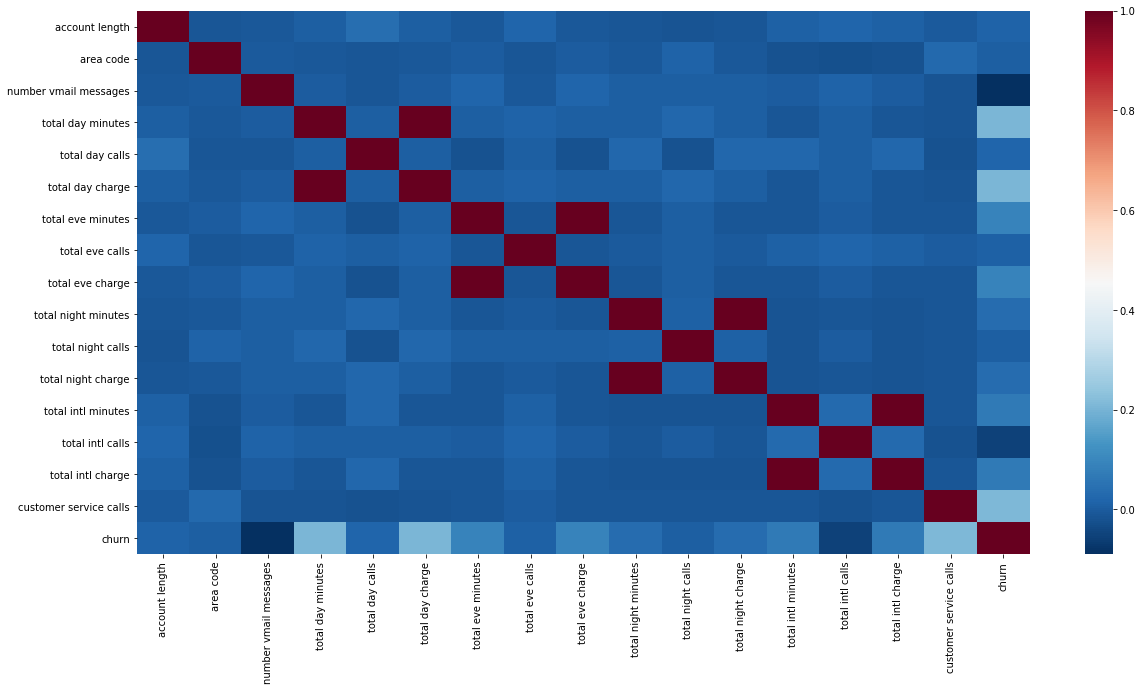

In [7]:
import seaborn as se
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [20,10]
se.heatmap(myData.corr(),cmap = "RdBu_r")


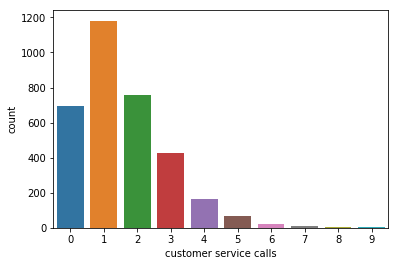

In [8]:
se.countplot(x='customer service calls', data=myData)

    Most clients make zero or a few calls. But how does this relate to churn then?
    

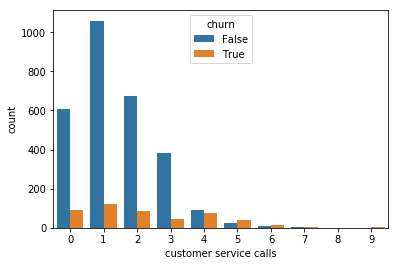

In [9]:

se.countplot(x='customer service calls',hue='churn', data=myData)

    So most people who churn have made a customer service call
    Lets relate to international Call

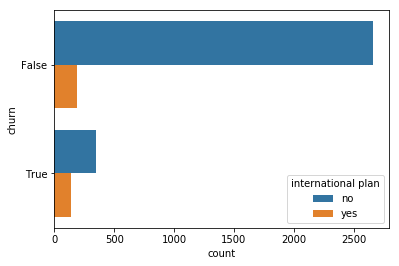

In [10]:
se.countplot(y='churn', hue='international plan', data=myData)

    That tells us that the international plan basically sucks. Compared to other customers they have a huge churn rate in proportion!


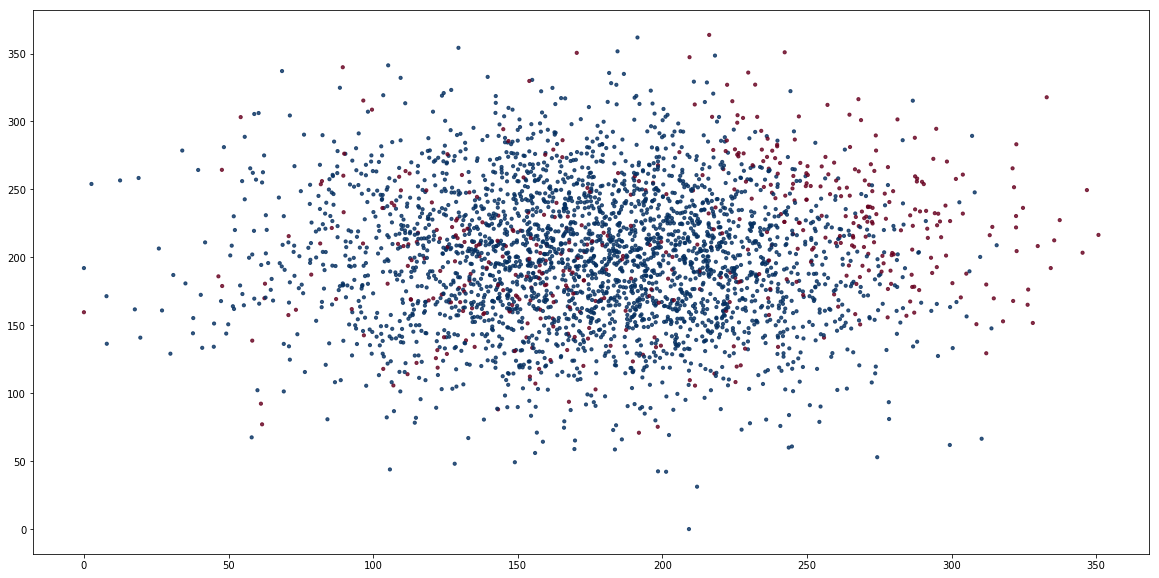

In [24]:
plt.scatter(x="total day minutes", y="total eve minutes", c="churn", s=10, alpha=0.8, cmap="RdBu_r", data=myData)

    More the people call more they chrun
  

In [12]:
myData['voice mail plan']


0        no
1        no
2        no
3       yes
4       yes
5       yes
6        no
7       yes
8        no
9       yes
10       no
11       no
12       no
13       no
14       no
15       no
16       no
17       no
18       no
19       no
20       no
21       no
22       no
23       no
24       no
25       no
26       no
27       no
28       no
29       no
       ... 
3303     no
3304    yes
3305     no
3306     no
3307     no
3308     no
3309    yes
3310     no
3311     no
3312     no
3313     no
3314     no
3315     no
3316     no
3317    yes
3318     no
3319     no
3320    yes
3321     no
3322     no
3323     no
3324     no
3325     no
3326     no
3327     no
3328     no
3329     no
3330     no
3331    yes
3332     no
Name: international plan, Length: 3333, dtype: object

In [13]:
myData['international plan']

0        no
1        no
2        no
3       yes
4       yes
5       yes
6        no
7       yes
8        no
9       yes
10       no
11       no
12       no
13       no
14       no
15       no
16       no
17       no
18       no
19       no
20       no
21       no
22       no
23       no
24       no
25       no
26       no
27       no
28       no
29       no
       ... 
3303     no
3304    yes
3305     no
3306     no
3307     no
3308     no
3309    yes
3310     no
3311     no
3312     no
3313     no
3314     no
3315     no
3316     no
3317    yes
3318     no
3319     no
3320    yes
3321     no
3322     no
3323     no
3324     no
3325     no
3326     no
3327     no
3328     no
3329     no
3330     no
3331    yes
3332     no
Name: international plan, Length: 3333, dtype: object

Lets Make It Numerical

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
myData['voice mail plan'] = le.fit_transform(myData['voice mail plan'])
myData['international plan'] = le.fit_transform(myData['international plan'])
myData['state'] = le.fit_transform(myData['state'])

In [16]:
myData['international plan']

0       0
1       0
2       0
3       1
4       1
5       1
6       0
7       1
8       0
9       1
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
3303    0
3304    1
3305    0
3306    0
3307    0
3308    0
3309    1
3310    0
3311    0
3312    0
3313    0
3314    0
3315    0
3316    0
3317    1
3318    0
3319    0
3320    1
3321    0
3322    0
3323    0
3324    0
3325    0
3326    0
3327    0
3328    0
3329    0
3330    0
3331    1
3332    0
Name: international plan, Length: 3333, dtype: int64

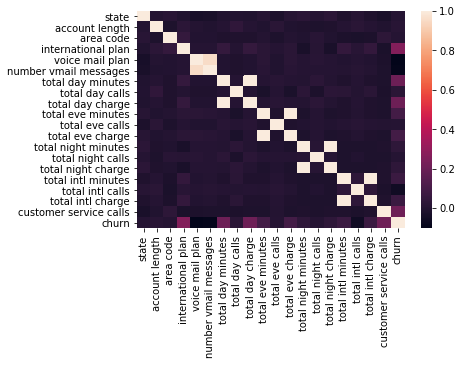

In [17]:
se.heatmap(myData.corr())

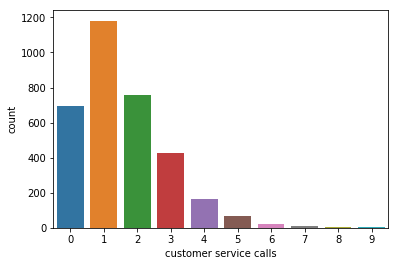

In [18]:
se.countplot(x='customer service calls', data=myData)

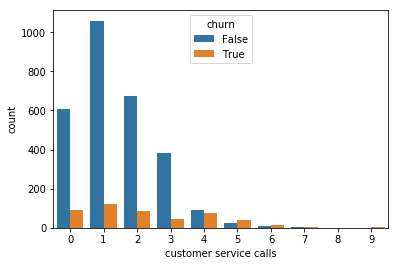

In [19]:
se.countplot(x='customer service calls', hue='churn', data=myData)

    So most people who churn have made a customer service call. Makes sense.

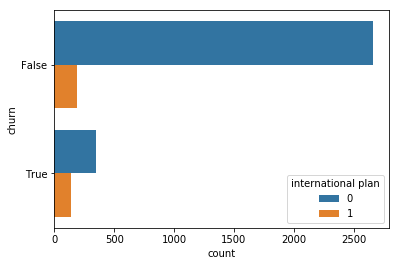

In [20]:
se.countplot(y='churn', hue='international plan', data=myData)

In [ ]:
    So inernational Plan had relation to chrun

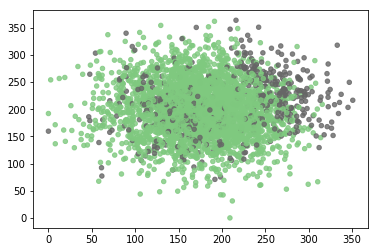

In [21]:
plt.scatter(x="total day minutes", y="total eve minutes", c="churn", s=20, alpha=0.8, cmap="Accent", data=myData)


    More People call more people leave

    Removing unncessary Column

In [22]:
myData = myData.drop(['phone number', 'area code', 'state'], axis=1)
#Seperate Label too
labels = myData['churn']
myData = myData.drop(['churn'], axis=1)

    Make the two set Training and Test

In [23]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(myData, labels, test_size=0.25)

    Lets Start the algo part

In [26]:
# Linear Classifier
from sklearn.linear_model import SGDClassifier
linear = SGDClassifier()
#SVM Classifier
from sklearn.svm import LinearSVC
vector = LinearSVC()
#Decision Tree
from sklearn import tree
tree = tree.DecisionTreeClassifier()
#Neural Network
from sklearn.neural_network import MLPClassifier
net = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(200, 10, 3), random_state=1)
#XGBoot Decision Tree -- Need to import seperately
#import xgboost as xgb
#boost = xgb.XGBClassifier()


    Let's train Now

In [27]:
linear.fit(X_train, Y_train)
vector.fit(X_train, Y_train)
tree.fit(X_train, Y_train)
net.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 10, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [29]:
myData.loc[2]

account length            137.00
international plan          0.00
voice mail plan             0.00
number vmail messages       0.00
total day minutes         243.40
total day calls           114.00
total day charge           41.38
total eve minutes         121.20
total eve calls           110.00
total eve charge           10.30
total night minutes       162.60
total night calls         104.00
total night charge          7.32
total intl minutes         12.20
total intl calls            5.00
total intl charge           3.29
customer service calls      0.00
Name: 2, dtype: float64

In [30]:
print("Linear:", linear.predict([myData.loc[2]]))
print("SVM:", vector.predict([myData.loc[2]]))
print("Decision Tree:", tree.predict([myData.loc[2]]))
print("Neural Net:", net.predict([myData.loc[2]]))
net.predict_proba([myData.loc[2],myData.loc[301],myData.loc[1000]])

Linear: [ True]
SVM: [False]
Decision Tree: [False]
Neural Net: [False]


array([[0.97824764, 0.02175236],
       [0.95625149, 0.04374851],
       [0.94982332, 0.05017668]])

    Evaluation

In [31]:
print("Linear:", linear.score(X_train, Y_train))
print("SVM:", vector.score(X_train, Y_train))
print("Decision Tree:", tree.score(X_train, Y_train))
#print("XGBoost:", boost.score(X_train, Y_train))
print("Neural Net:", net.score(X_train, Y_train))

Linear: 0.21248499399759904
SVM: 0.8595438175270108
Decision Tree: 1.0
Neural Net: 0.8847539015606243


In [32]:
print("Linear:", linear.score(x_test, y_test))
print("SVM:", vector.score(x_test, y_test))
print("Decision Tree:", tree.score(x_test, y_test))
#print("XGBoost:", boost.score(x_test, y_test))
print("Neural Net:", net.score(x_test, y_test))

Linear: 0.2314148681055156
SVM: 0.8501199040767387
Decision Tree: 0.9016786570743405
Neural Net: 0.8597122302158273


    Lets get the classification report

In [33]:
from sklearn.metrics import classification_report
y_tree = tree.predict(x_test)
y_net = net.predict(x_test)
print("DT", classification_report(y_test, y_tree))
print("------------------------------------------------------")
print("NN", classification_report(y_test, y_net))

DT               precision    recall  f1-score   support

       False       0.95      0.94      0.94       707
        True       0.67      0.71      0.69       127

   micro avg       0.90      0.90      0.90       834
   macro avg       0.81      0.82      0.81       834
weighted avg       0.90      0.90      0.90       834

------------------------------------------------------
NN               precision    recall  f1-score   support

       False       0.89      0.96      0.92       707
        True       0.57      0.31      0.40       127

   micro avg       0.86      0.86      0.86       834
   macro avg       0.73      0.63      0.66       834
weighted avg       0.84      0.86      0.84       834



    So who wins? Well, it looks like the neural net (bottom numbers) is struggling with false positives (Precision) and false negatives (Recall). That’s not ideal at all, since the True case is what we really care about, i.e. customers who do churn.

    So Decision Tree takes it, in this case? Yes, definitely. Is it perfect? No, nothing is. The ultimate answer depends on the type of problem you’re solving, and what the risk of false positives/negatives is. If you’re predicting cancer or something, it’s pretty important!